In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Projects/Data_Sets/train.csv")
test = pd.read_csv('/content/drive/MyDrive/ML Projects/Data_Sets/test.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Checking the missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
def clean(df):
    # Remove unwanted columns
    df = df.drop(columns=['Cabin','Ticket','Name'], axis=1)

    # Fill missing values without chained assignment
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    return df  # RETURN the cleaned dataframe

df = clean(df)      # Clean training data
test = clean(test)  # Clean test data


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.groupby("Survived").mean(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


In [ ]:
from sklearn.preprocessing import LabelEncoder

def encoding(df):
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])

    # One-hot encode 'Embarked' and assign back to df
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

    return df
df = encoding(df)
test = encoding(test)

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

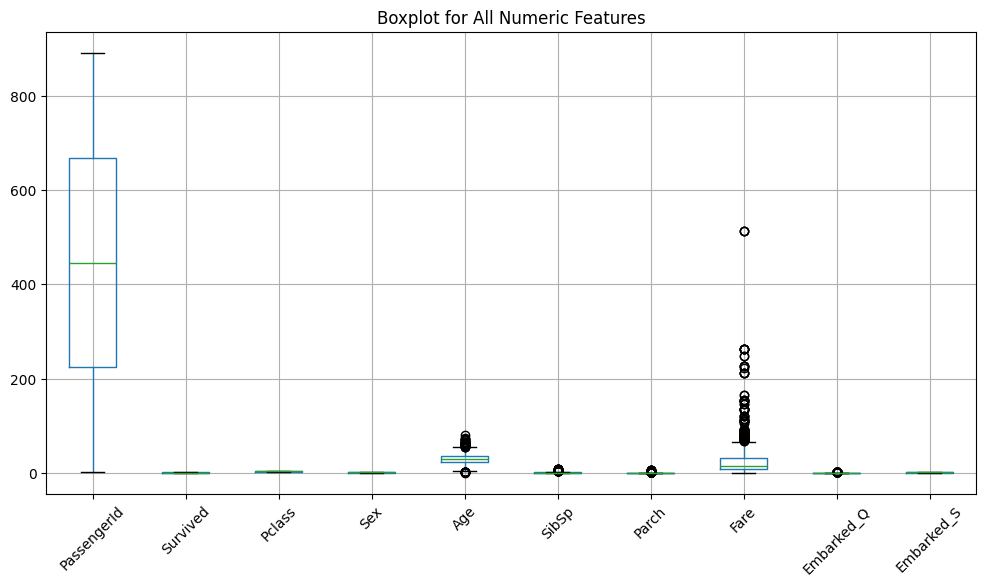

In [ ]:
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title('Boxplot for All Numeric Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Sex: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers
Embarked_Q: 77 outliers
Embarked_S: 0 outliers


In [ ]:
def outlier_treatment(df):
  median_age = df['Age'].median()
  df.loc[df['Age'] > upper_bound, 'Age'] = median_age
  df['Fare'] = np.log1p(df['Fare'])  # log1p handles zero values safely
  return df

df = outlier_treatment(df)
test = outlier_treatment(test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


# Transform test numeric features using the same scaler
test[['Age', 'Fare']] = scaler.transform(test[['Age', 'Fare']])


In [ ]:
X = df[["Pclass","Sex","Age","SibSp","Parch","Fare"]]
y = df[["Survived"]]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. GridSearch for best hyperparameters
model = LogisticRegression(max_iter=100)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy: 0.813158672313602


In [ ]:
# 4. Train final model with class_weight='balanced' on resampled data
best_model = LogisticRegression(
    C=grid.best_params_['C'],
    penalty=grid.best_params_['penalty'],
    solver=grid.best_params_['solver'],
    max_iter=100
)

In [ ]:
best_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, penalty='l1', solver='saga')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Predict on test data
y_pred = grid.predict(X_test)

In [ ]:
# 5. Predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[89 16]
 [23 51]]
ROC-AUC: 0.8643500643500643


In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



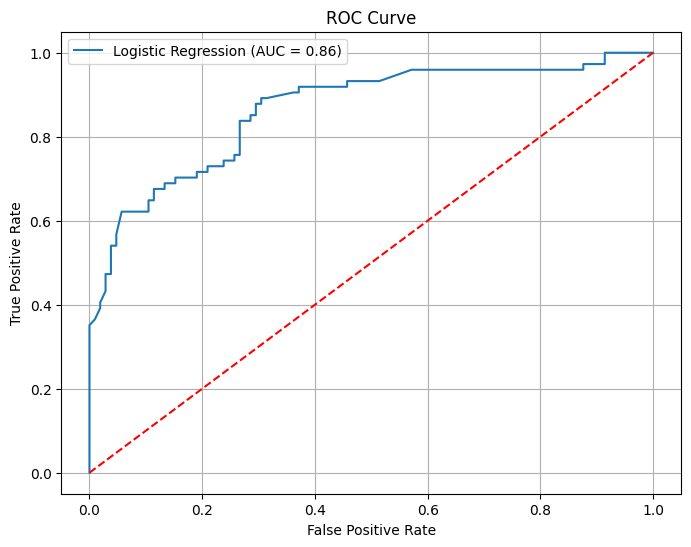

In [ ]:
# 7. Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_test_kaggle = test[X_train.columns]  # select same columns as your trained model
predictions = best_model.predict(X_test_kaggle)

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    "Survived": predictions
})

In [ ]:
submission.to_csv("/content/drive/MyDrive/ML Projects/submission.csv", index=False)
